# Data Analysis and Visualization Assignment # 03
### Student Name : Ali Shoaib
### Student Roll No: NIM-BSCS-2021-33
### Intructor : Mohammad Bilal

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data file and use short names for Columns

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"cleaned_data.csv")

# Create a dictionary mapping original column names to short names
short_names = {
    'Entity': 'Country',
    'Year': 'Year',
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
}

# Rename columns in the DataFrame using short names
df.rename(columns=short_names, inplace=True)
df

,Country,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6188,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6189,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6190,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6191,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [3]:
# Check if 'Year' is already the index
if 'Year' not in df.index.names:
    # Set 'Year' as the index if it is not already the index
    if 'Year' in df.columns:
        df.index = pd.to_datetime(df.index)
        df.set_index('Year', inplace=True)
    else:
        raise KeyError("Column 'Year' does not exist in the DataFrame.")
else:
    print("'Year' is already set as the index.")

# Print the DataFrame
print(df)



          Country Code  Schizophrenia  Depressive   Anxiety   Bipolar  \
Year                                                                    
1990  Afghanistan  AFG       0.223206    4.996118  4.713314  0.703023   
1991  Afghanistan  AFG       0.222454    4.989290  4.702100  0.702069   
1992  Afghanistan  AFG       0.221751    4.981346  4.683743  0.700792   
1993  Afghanistan  AFG       0.220987    4.976958  4.673549  0.700087   
1994  Afghanistan  AFG       0.220183    4.977782  4.670810  0.699898   
...           ...  ...            ...         ...       ...       ...   
2015     Zimbabwe  ZWE       0.201042    3.407624  3.184012  0.538596   
2016     Zimbabwe  ZWE       0.201319    3.410755  3.187148  0.538593   
2017     Zimbabwe  ZWE       0.201639    3.411965  3.188418  0.538589   
2018     Zimbabwe  ZWE       0.201976    3.406929  3.172111  0.538585   
2019     Zimbabwe  ZWE       0.202482    3.395476  3.137017  0.538580   

        Eating  
Year            
1990  0.127700  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [5]:
print(df.head())
print(df.info())



          Country Code  Schizophrenia  Depressive   Anxiety   Bipolar  \
Year                                                                    
1990  Afghanistan  AFG       0.223206    4.996118  4.713314  0.703023   
1991  Afghanistan  AFG       0.222454    4.989290  4.702100  0.702069   
1992  Afghanistan  AFG       0.221751    4.981346  4.683743  0.700792   
1993  Afghanistan  AFG       0.220987    4.976958  4.673549  0.700087   
1994  Afghanistan  AFG       0.220183    4.977782  4.670810  0.699898   

        Eating  
Year            
1990  0.127700  
1991  0.123256  
1992  0.118844  
1993  0.115089  
1994  0.111815  
<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 1990 to 2019
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        6193 non-null   object 
 1   Code           6193 non-null   object 
 2   Schizophrenia  6193 non-null   float64
 3   Depressive     6193 non-null   float64
 

# Visualize the time Series data of Pakistan

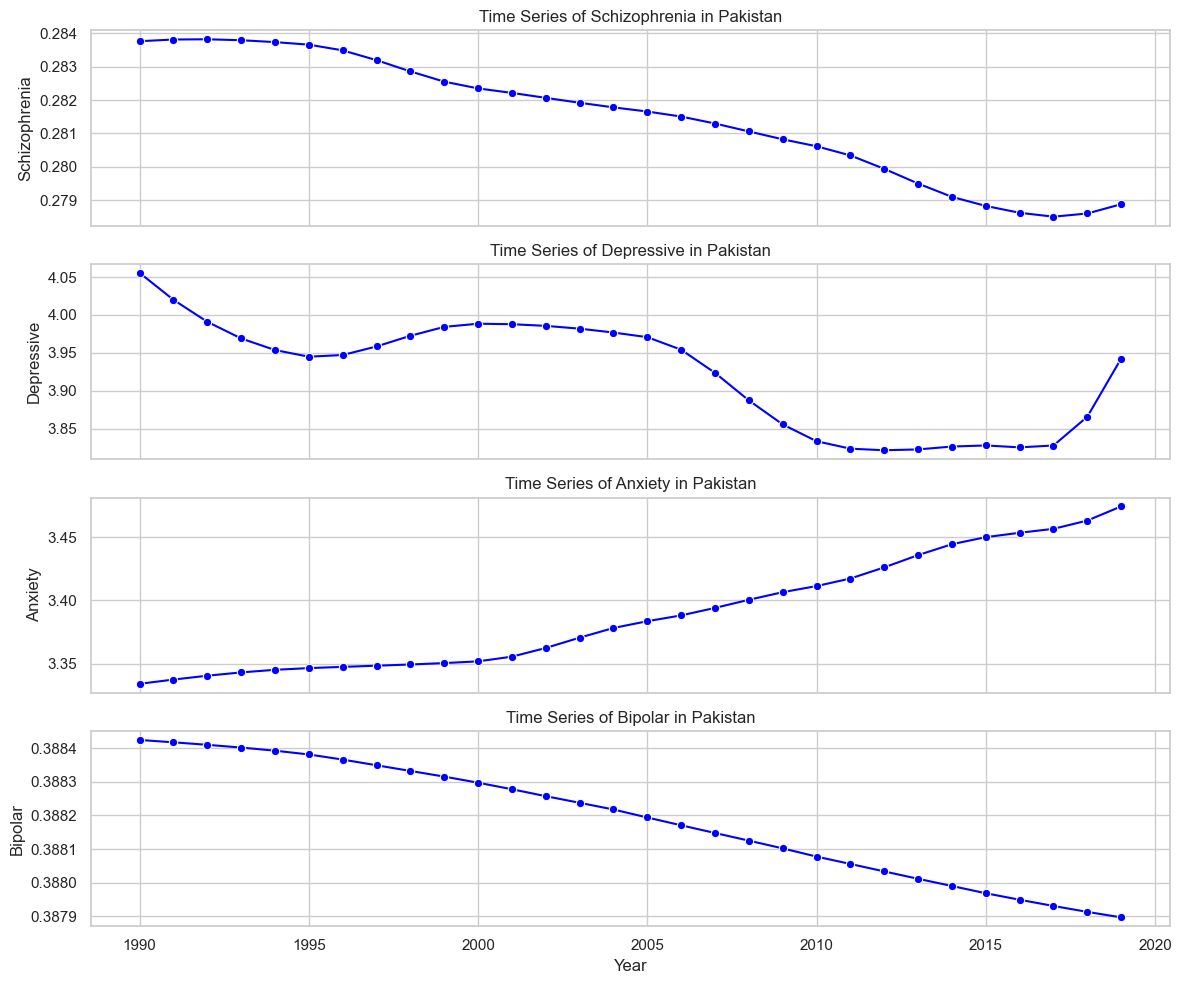

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mental_health_time_series(df, country, features):
    """
    Plots the time series of mental health disorders for a given country.

    Parameters:
    df (DataFrame): The data frame containing the data.
    country (str): The name of the country to plot the data for.
    features (list): A list of features (mental health disorders) to plot.

    Returns:
    None
    """
    # Filter the DataFrame for the selected country
    df_country = df[df['Country'] == country]

    # Set the Seaborn style
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(len(features), 1, figsize=(12, 10), sharex=True)

    # Plot time series for each feature for the selected country
    for i, feature in enumerate(features):
        sns.lineplot(data=df_country, x='Year', y=feature, marker='o', ax=axes[i], color='blue')
        axes[i].set_title(f'Time Series of {feature} in {country}')
        axes[i].set_ylabel(feature)

    # Set the x-axis label for the last subplot
    axes[-1].set_xlabel('Year')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage
features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar']
plot_mental_health_time_series(df, 'Pakistan', features)


# Visualize Time Series Data for all Countries

In [7]:
# Extract all unique country names
countries = df['Country'].unique()

# Define the features to be plotted
features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar']

# Loop through each country and call the function
# for country in countries:
#    plot_mental_health_time_series(df, country, features)



# Check for Stationarity and Differencing
Function to perform the Augmented Dickey-Fuller test and differencing if necessary:

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(df, country, feature_name):
    """
    Performs the Augmented Dickey-Fuller test for a given feature and country.

    Parameters:
    df (DataFrame): The data frame containing the data.
    country (str): The name of the country.
    feature_name (str): The name of the feature to test for stationarity.

    Returns:
    bool: True if the feature is stationary, False otherwise.
    """
    # Filter the DataFrame for the selected country and feature
    series = df[df['Country'] == country][feature_name]
    
    # Perform the ADF test
    result = adfuller(series)
    
    # Print the results
    print(f'ADF Statistic for {feature_name} in {country}: {result[0]}')
    print(f'p-value for {feature_name} in {country}: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Values {key} for {feature_name} in {country}: {value}')
    
    # Determine if the series is stationary
    if result[1] > 0.05:
        print(f'{feature_name} in {country} is not stationary. Differencing is required.')
        return False
    else:
        print(f'{feature_name} in {country} is stationary.')
        return True

def apply_differencing(df, country, features, stationarity_results):
    """
    Applies differencing to the specified features for the given country if they are not stationary.

    Parameters:
    df (DataFrame): The data frame containing the data.
    country (str): The name of the country.
    features (list): A list of features to be differenced if not stationary.
    stationarity_results (dict): A dictionary with features as keys and their stationarity as boolean values.

    Returns:
    DataFrame: A new DataFrame with differenced features where necessary.
    """
    # Filter the DataFrame for the selected country
    df_country = df[df['Country'] == country].copy()
    df_country_diff = df_country.copy()
    
    for feature in features:
        if not stationarity_results[feature]:
            df_country_diff[feature] = df_country[feature].diff()
    
    # Drop NaNs introduced by differencing
    df_country_diff.dropna(inplace=True)
    
    return df_country_diff

# Example usage
# Define the countries to be tested
countries = ['Pakistan']

# Define the features to be tested
features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar']

# Create a dictionary to store stationarity results
stationarity_results = {}

# Loop through each country and each feature to test for stationarity
for country in countries:
    if country in df['Country'].unique():
        print(f"\nProcessing country: {country}")
        country_stationarity_results = {}
        for feature in features:
            stationary = adf_test(df, country, feature)
            country_stationarity_results[feature] = stationary
            print()
        stationarity_results[country] = country_stationarity_results
        
        # Apply differencing based on stationarity results
        df_pakistan_diff = apply_differencing(df, country, features, country_stationarity_results)
        
    else:
        print(f"Country {country} is not present in the dataset.")


# Display the stationarity results
print("\nStationarity Results:")
for country, results in stationarity_results.items():
    print(f"\nCountry: {country}")
    for feature, is_stationary in results.items():
        print(f"  {feature}: {'Stationary' if is_stationary else 'Not Stationary'}")

print(f"\nDifferenced Data for {country}:")
print(df_pakistan_diff)


Processing country: Pakistan
ADF Statistic for Schizophrenia in Pakistan: 0.7891601741963782
p-value for Schizophrenia in Pakistan: 0.9914591626337902
Critical Values 1% for Schizophrenia in Pakistan: -3.7883858816542486
Critical Values 5% for Schizophrenia in Pakistan: -3.013097747543462
Critical Values 10% for Schizophrenia in Pakistan: -2.6463967573696143
Schizophrenia in Pakistan is not stationary. Differencing is required.

ADF Statistic for Depressive in Pakistan: -3.2898775519740457
p-value for Depressive in Pakistan: 0.015337056156502016
Critical Values 1% for Depressive in Pakistan: -3.8092091249999998
Critical Values 5% for Depressive in Pakistan: -3.0216450000000004
Critical Values 10% for Depressive in Pakistan: -2.6507125
Depressive in Pakistan is stationary.

ADF Statistic for Anxiety in Pakistan: 1.5551222111600362
p-value for Anxiety in Pakistan: 0.9977164934162829
Critical Values 1% for Anxiety in Pakistan: -3.7112123008648155
Critical Values 5% for Anxiety in Pakista

# Decompose the data to see Seasonality, trend and Residual

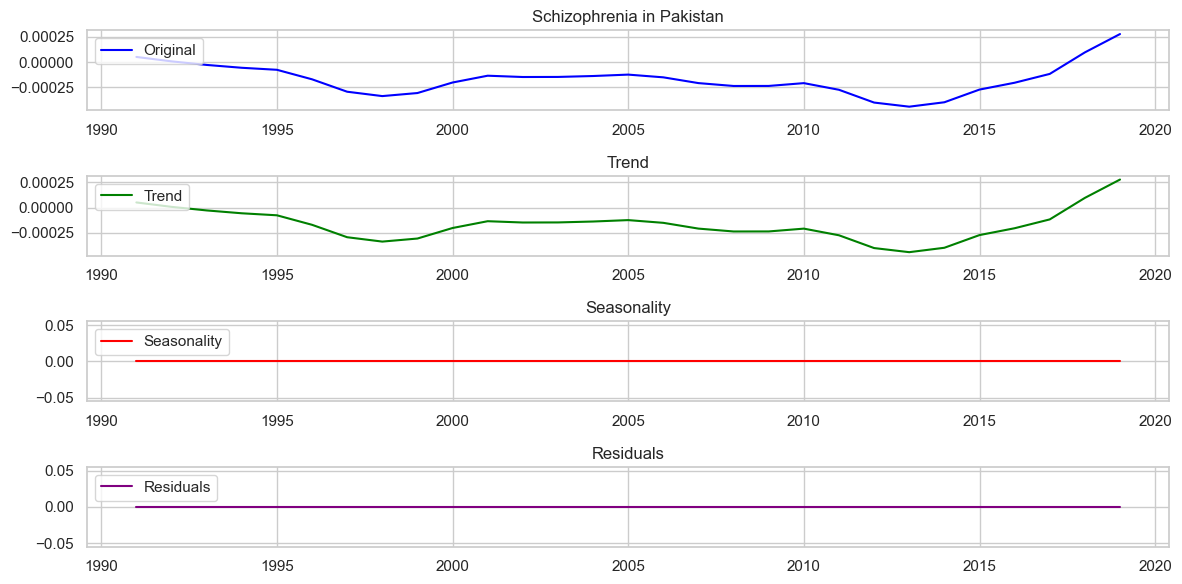

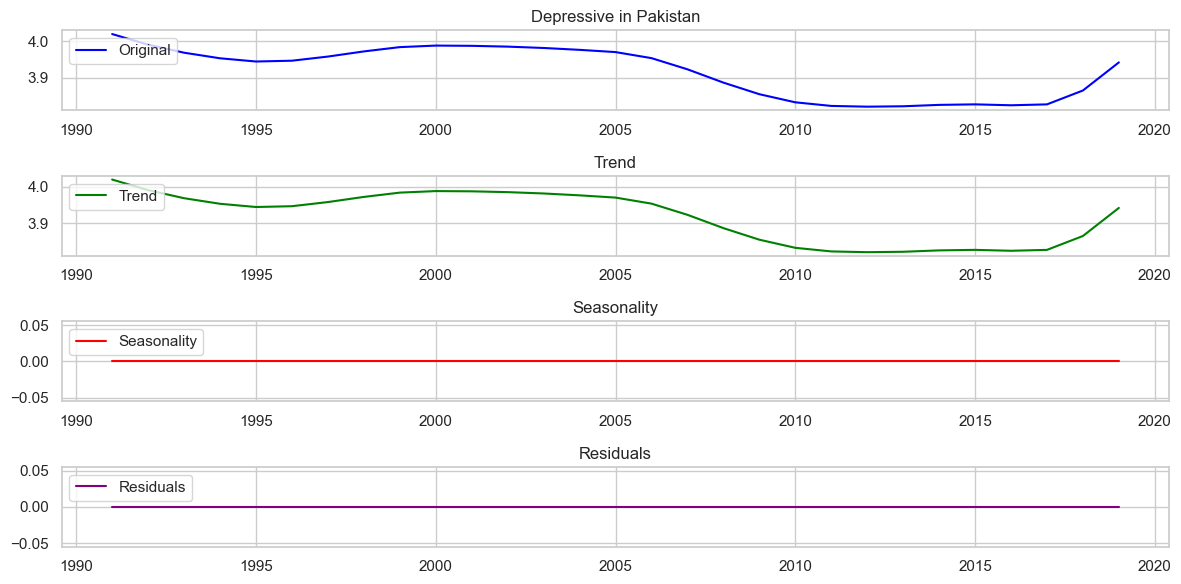

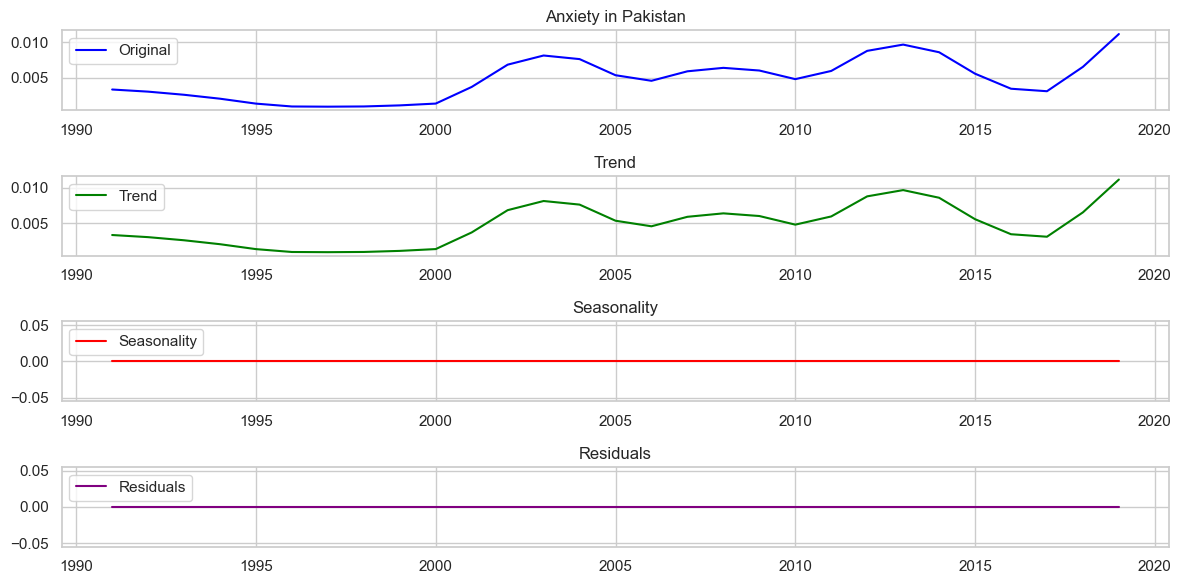

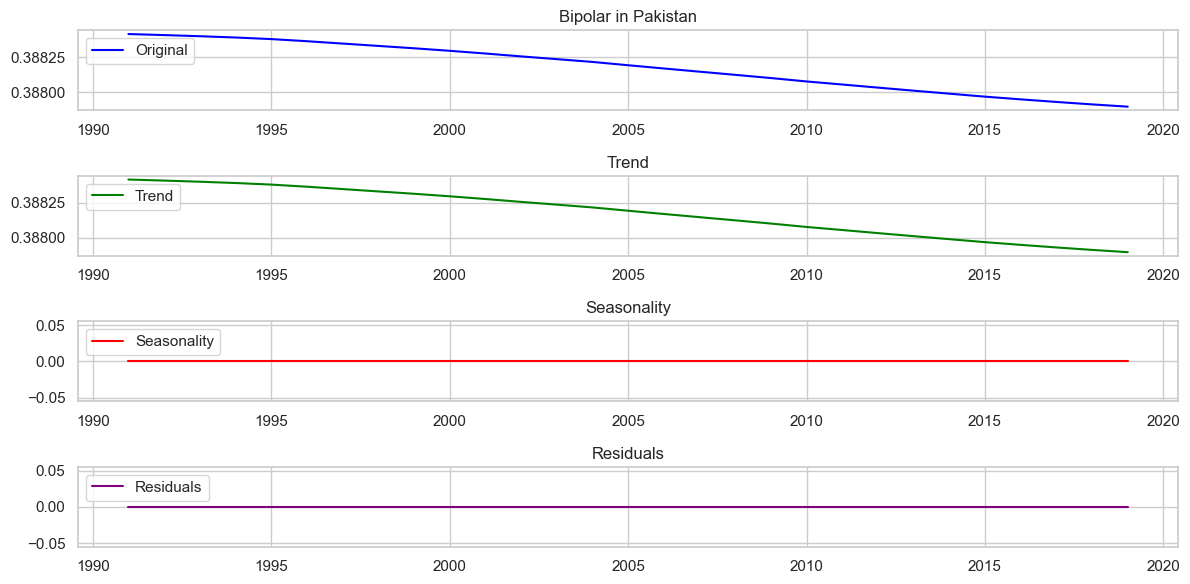

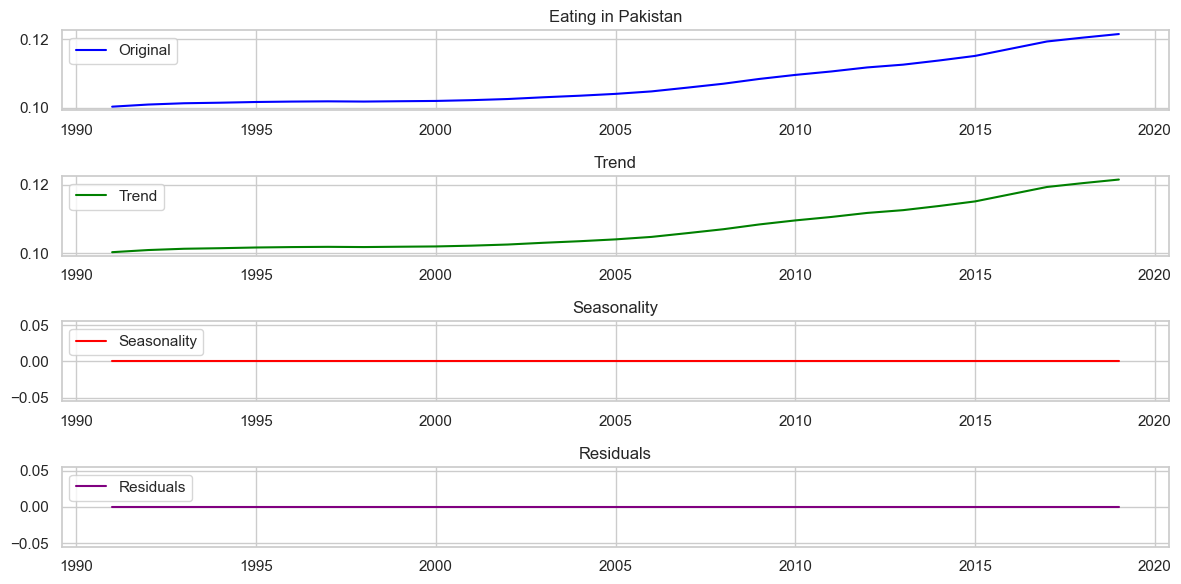

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Define a function to decompose and plot each variable
def plot_decomposition(data, variable):
    decomposition = seasonal_decompose(data, model='additive', period=1)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 6))
    
    # Plot the original time series
    plt.subplot(411)
    plt.plot(data, label='Original', color='blue')
    plt.title(f'{variable} in Pakistan')
    plt.legend(loc='upper left')
    
    # Plot the trend component
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='green')
    plt.title('Trend')
    plt.legend(loc='upper left')
    
    # Plot the seasonal component
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color='red')
    plt.title('Seasonality')
    plt.legend(loc='upper left')
    
    # Plot the residual component
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='purple')
    plt.title('Residuals')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Loop through each variable for decomposition and plotting
for variable in df.columns[2:]:  # Exclude 'Year' and 'Country Code' columns
    data = df_pakistan_diff[variable]
    plot_decomposition(data, variable)


# visualize the autocorrelation function (ACF) and partial autocorrelation function (PACF)

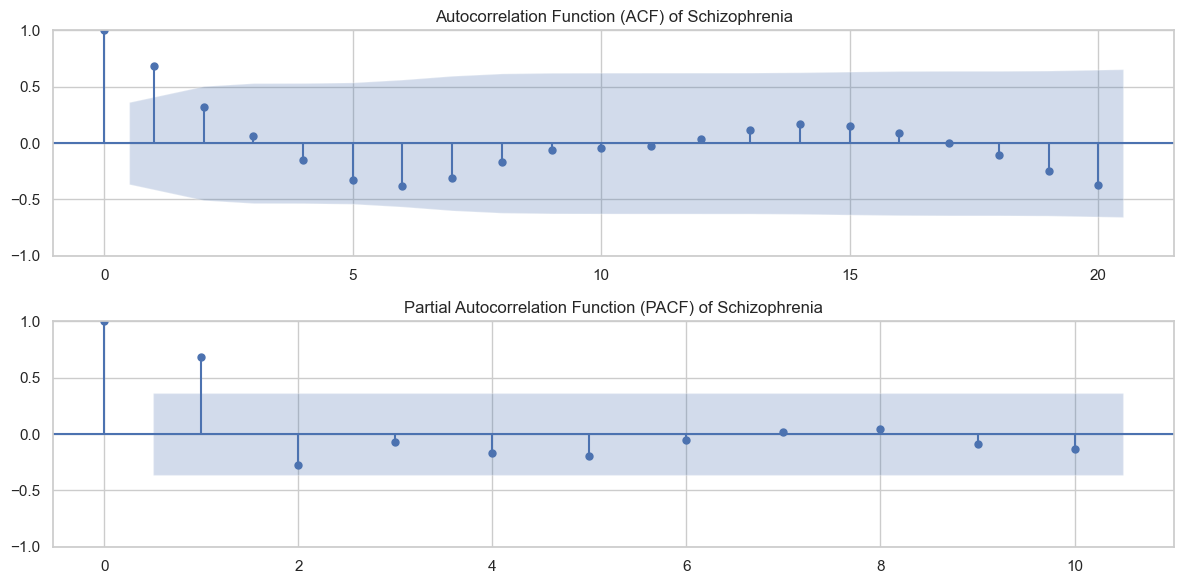

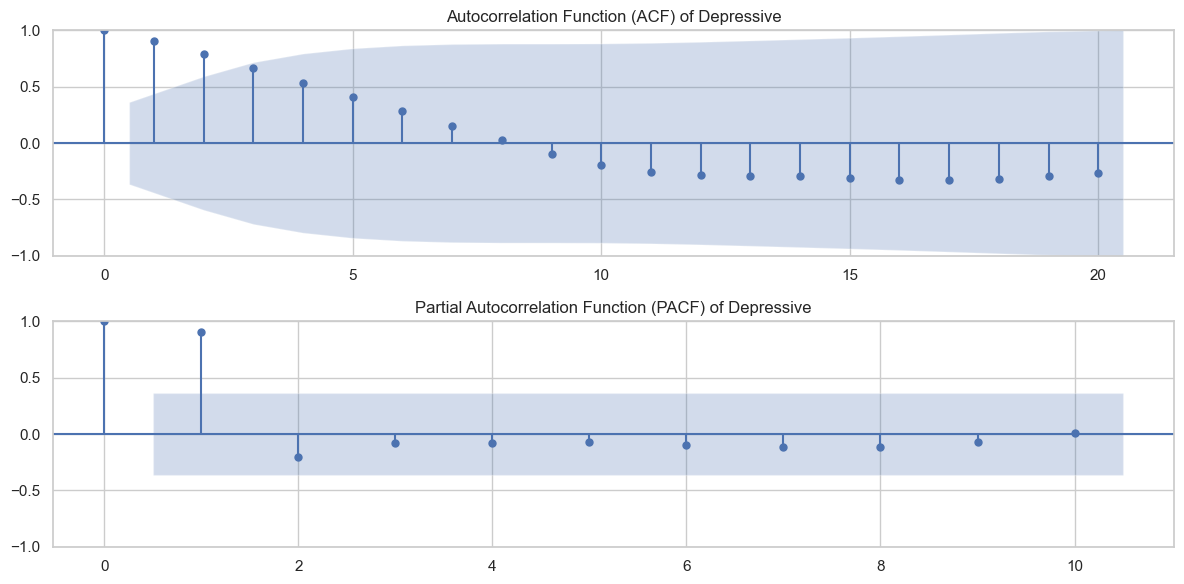

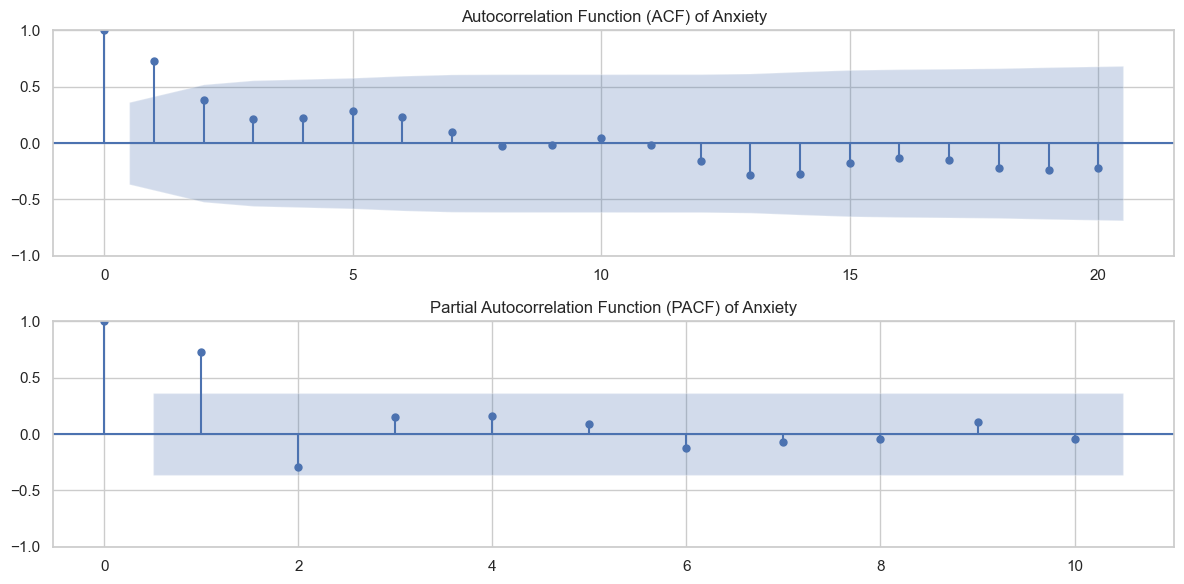

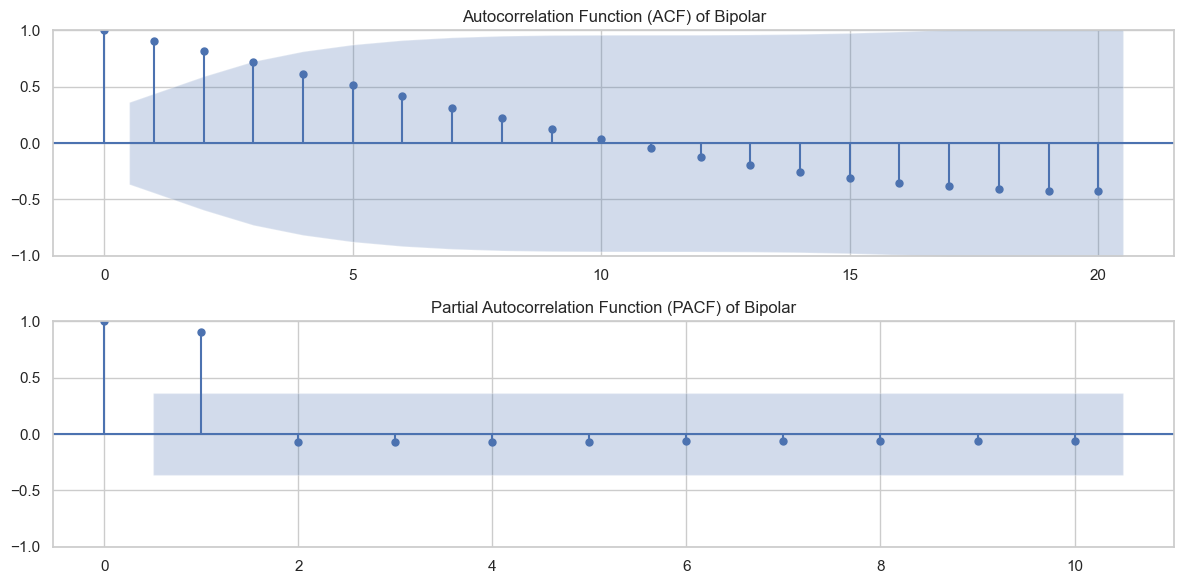

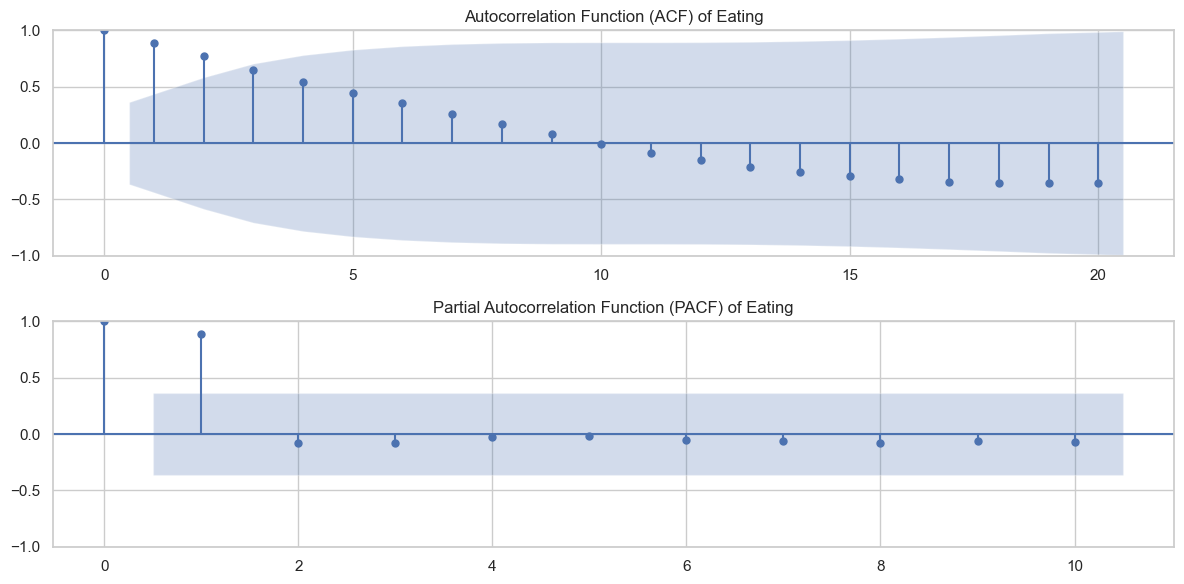

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to plot ACF and PACF
def plot_acf_pacf(data, variable):
    fig, ax = plt.subplots(2, figsize=(12, 6))
    plot_acf(data, ax=ax[0], lags=20)
    ax[0].set_title(f'Autocorrelation Function (ACF) of {variable}')
    plot_pacf(data, ax=ax[1], lags=10)  # Reduce the number of lags to 10
    ax[1].set_title(f'Partial Autocorrelation Function (PACF) of {variable}')
    plt.tight_layout()
    plt.show()

# Loop through each variable for plotting ACF and PACF
for variable in df.columns[2:]:  # Exclude 'Year' and 'Country Code' columns
    data = df_pakistan_diff[variable]
    plot_acf_pacf(data, variable)


# Apply ARIMA Model for Depressive Disorder

       Country Code  Schizophrenia  Depressive   Anxiety   Bipolar    Eating
Year                                                                        
1990  Pakistan  PAK       0.283757    4.055531  3.334211  0.388424  0.099587
1991  Pakistan  PAK       0.283808    4.019988  3.337557  0.388417  0.100297
1992  Pakistan  PAK       0.283815    3.991014  3.340603  0.388410  0.100916
1993  Pakistan  PAK       0.283787    3.969019  3.343208  0.388402  0.101293
1994  Pakistan  PAK       0.283730    3.953770  3.345258  0.388392  0.101454


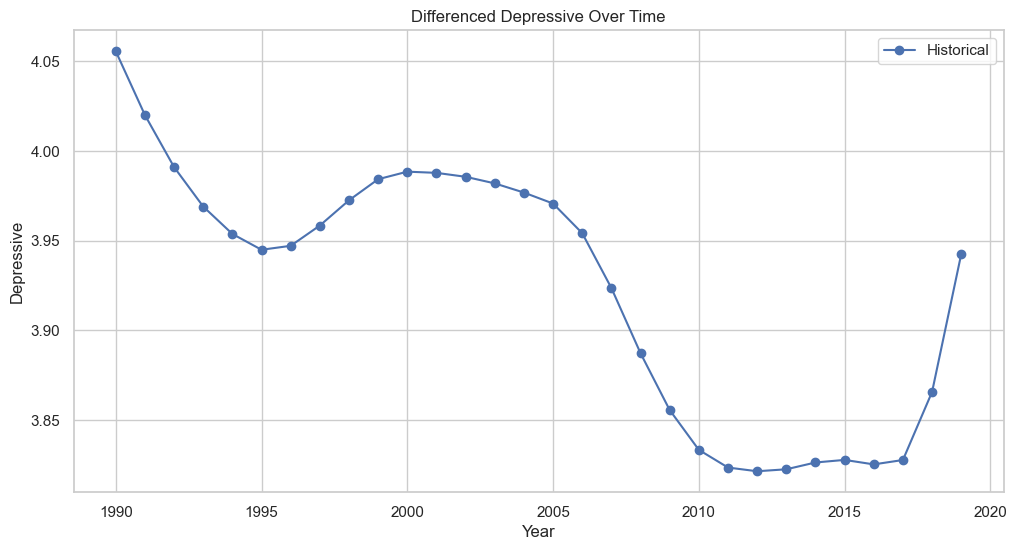

                               SARIMAX Results                                
Dep. Variable:             Depressive   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 104.352
Date:                Wed, 12 Jun 2024   AIC                           -198.704
Time:                        00:41:30   BIC                           -191.867
Sample:                             0   HQIC                          -196.562
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3127      0.670      1.960      0.050       0.000       2.625
ar.L2         -0.5744      0.661     -0.869      0.385      -1.870       0.721
ma.L1          1.1565      0.795      1.456      0.1

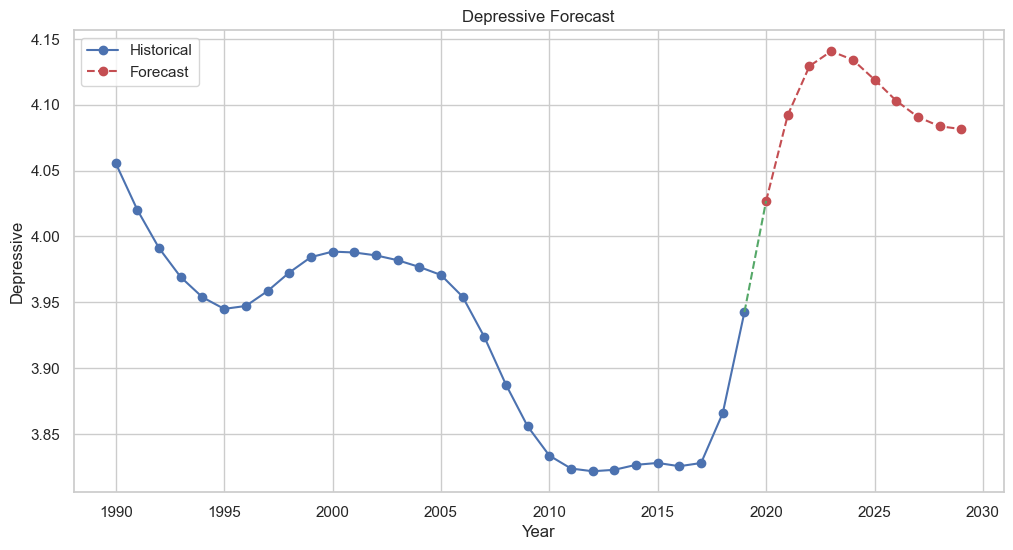

In [27]:
import warnings
warnings.filterwarnings("ignore")

# Filter data for Pakistan
df_pakistan_diff = df[df['Country'] == 'Pakistan']

# Ensure the dataframe and its structure
print(df_pakistan_diff.head())

# Plot the differenced data to visualize the Schizophrenia trend
plt.figure(figsize=(12, 6))
plt.plot(df_pakistan_diff.index, df_pakistan_diff['Depressive'], marker='o', linestyle='-', color='b', label='Historical')
plt.title('Differenced Depressive Over Time')
plt.xlabel('Year')
plt.ylabel('Depressive')
plt.grid(True)
plt.legend()
plt.show()

# Perform ARIMA Modeling
# Define ARIMA parameters (p, d, q)
p, d, q = 2, 1, 2  # These values should be chosen based on ACF/PACF plots and model evaluation criteria

# Fit ARIMA model
model = ARIMA(df_pakistan_diff['Depressive'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Predict future values
forecast = model_fit.forecast(steps=10)
forecast_years = list(range(2020, 2030))

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Year': forecast_years, 'Forecast': forecast})
future_df.set_index('Year', inplace=True)

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df_pakistan_diff.index, df_pakistan_diff['Depressive'], marker='o', linestyle='-', color='b', label='Historical')
plt.plot(future_df.index, future_df['Forecast'], marker='o', linestyle='--', color='r', label='Forecast')

# Connect the last historical data point to the first forecasted data point
plt.plot([df_pakistan_diff.index[-1], future_df.index[0]], [df_pakistan_diff['Depressive'].iloc[-1], future_df['Forecast'].iloc[0]], linestyle='--', color='g')

plt.title('Depressive Forecast')
plt.xlabel('Year')
plt.ylabel('Depressive')
plt.legend()
plt.grid(True)
plt.show()


# Apply ARIMA Model for Anxiety Disorder in Pakistan

       Country Code  Schizophrenia  Depressive   Anxiety   Bipolar    Eating
Year                                                                        
1990  Pakistan  PAK       0.283757    4.055531  3.334211  0.388424  0.099587
1991  Pakistan  PAK       0.283808    4.019988  3.337557  0.388417  0.100297
1992  Pakistan  PAK       0.283815    3.991014  3.340603  0.388410  0.100916
1993  Pakistan  PAK       0.283787    3.969019  3.343208  0.388402  0.101293
1994  Pakistan  PAK       0.283730    3.953770  3.345258  0.388392  0.101454


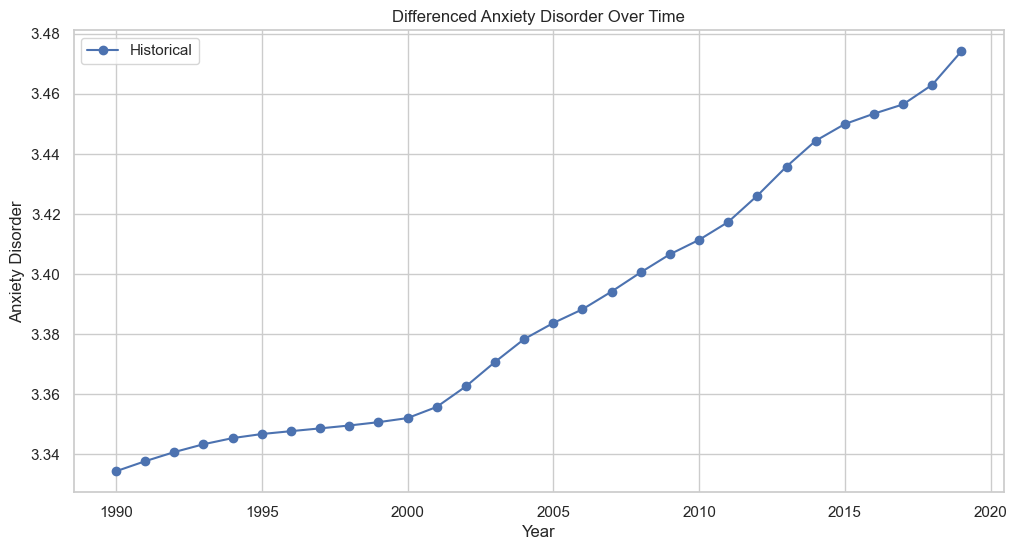

                               SARIMAX Results                                
Dep. Variable:                Anxiety   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 141.562
Date:                Wed, 12 Jun 2024   AIC                           -277.125
Time:                        00:23:58   BIC                           -273.023
Sample:                             0   HQIC                          -275.840
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9782      0.043     22.631      0.000       0.894       1.063
ma.L1       9.527e-06      0.215   4.42e-05      1.000      -0.422       0.422
sigma2      3.012e-06   9.89e-07      3.045      0.0

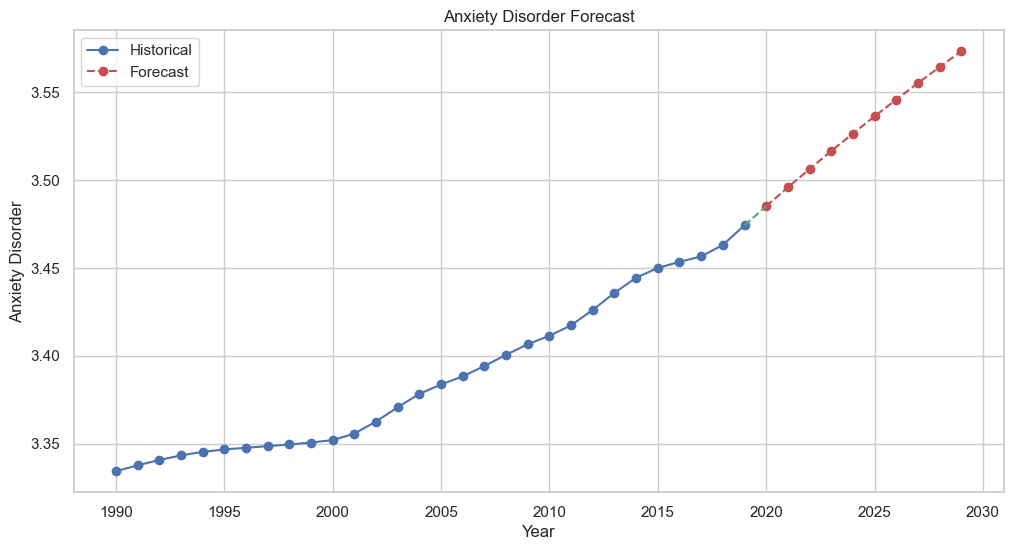

In [26]:
import warnings
warnings.filterwarnings("ignore")

# Filter data for Pakistan
df_pakistan_diff = df[df['Country'] == 'Pakistan']

# Ensure the dataframe and its structure
print(df_pakistan_diff.head())

# Plot the differenced data to visualize the Anxiety Disorder trend
plt.figure(figsize=(12, 6))
plt.plot(df_pakistan_diff.index, df_pakistan_diff['Anxiety'], marker='o', linestyle='-', color='b', label='Historical')
plt.title('Differenced Anxiety Disorder Over Time')
plt.xlabel('Year')
plt.ylabel('Anxiety Disorder')
plt.grid(True)
plt.legend()
plt.show()

# Perform ARIMA Modeling
# Define ARIMA parameters (p, d, q)
p, d, q = 1, 1, 1  # These values should be chosen based on ACF/PACF plots and model evaluation criteria

# Fit ARIMA model
model = ARIMA(df_pakistan_diff['Anxiety'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Predict future values
forecast = model_fit.forecast(steps=10)
forecast_years = list(range(2020, 2030))

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Year': forecast_years, 'Forecast': forecast})
future_df.set_index('Year', inplace=True)

# Plot the historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df_pakistan_diff.index, df_pakistan_diff['Anxiety'], marker='o', linestyle='-', color='b', label='Historical')
plt.plot(future_df.index, future_df['Forecast'], marker='o', linestyle='--', color='r', label='Forecast')

# Connect the last historical data point to the first forecasted data point
plt.plot([df_pakistan_diff.index[-1], future_df.index[0]], [df_pakistan_diff['Anxiety'].iloc[-1], future_df['Forecast'].iloc[0]], linestyle='--', color='g')

plt.title('Anxiety Disorder Forecast')
plt.xlabel('Year')
plt.ylabel('Anxiety Disorder')
plt.legend()
plt.grid(True)
plt.show()
